## 제공 데이터 불러오기

In [ ]:
from geoband.API import *

GetCompasData('SBJ_2206_001', '1', '1.김해시_CCTV설치현황.csv')
GetCompasData('SBJ_2206_001', '2', '2.김해시_주차장현황.csv')
GetCompasData('SBJ_2206_001', '3', '3.김해시_성연령별_요일별_유동인구.zip')
GetCompasData('SBJ_2206_001', '25', '4.김해시_112신고이력(격자매핑).csv')
GetCompasData('SBJ_2206_001', '5', '5.김해시_격자(100X100).geojson')
GetCompasData('SBJ_2206_001', '6', '6.김해시_보안등설치현황.csv')
GetCompasData('SBJ_2206_001', '28', '7.김해시_안전비상벨설치현황.csv')
GetCompasData('SBJ_2206_001', '26', '8.김해시_공원현황.geojson')
GetCompasData('SBJ_2206_001', '9', '9.김해시_하천현황.geojson')
GetCompasData('SBJ_2206_001', '22', '10.김해시_성연령별_거주인구격자.geojson')
GetCompasData('SBJ_2206_001', '11', '11.김해시_외국인_읍면동별_격자.geojson')
GetCompasData('SBJ_2206_001', '23', '12.김해시_건물노후도.geojson')
GetCompasData('SBJ_2206_001', '13', '13.김해시_도로명주소(건물).geojson')
GetCompasData('SBJ_2206_001', '14', '14.김해시_법정경계(읍면동).geojson')
GetCompasData('SBJ_2206_001', '15', '15.김해시_행정경계(읍면동).geojson')
GetCompasData('SBJ_2206_001', '27', '16.김해시_토지소유정보.geojson')
GetCompasData('SBJ_2206_001', '17', '17.김해시_어린이집현황.csv')
GetCompasData('SBJ_2206_001', '18', '18.김해시_유치원현황.csv')
GetCompasData('SBJ_2206_001', '19', '19.김해시_학교(초,중,고)현황.csv')
GetCompasData('SBJ_2206_001', '24', '20.김해시_치안_유관업종_현황.csv')
GetCompasData('SBJ_2206_001', '21', '21.김해시_아동안전지킴이집_현황.csv')

[2022-08-19 12:58:27] 성공 - 1.김해시_CCTV설치현황.csv
[2022-08-19 12:58:27] 성공 - 2.김해시_주차장현황.csv
[2022-08-19 12:58:31] 성공 - 3.김해시_성연령별_요일별_유동인구.zip
[2022-08-19 12:58:32] 성공 - 4.김해시_112신고이력(격자매핑).csv
[2022-08-19 12:58:32] 성공 - 5.김해시_격자(100X100).geojson
[2022-08-19 12:58:32] 성공 - 6.김해시_보안등설치현황.csv
[2022-08-19 12:58:32] 성공 - 7.김해시_안전비상벨설치현황.csv
[2022-08-19 12:58:32] 성공 - 8.김해시_공원현황.geojson
[2022-08-19 12:58:32] 성공 - 9.김해시_하천현황.geojson
[2022-08-19 12:58:33] 성공 - 10.김해시_성연령별_거주인구격자.geojson
[2022-08-19 12:58:34] 성공 - 11.김해시_외국인_읍면동별_격자.geojson
[2022-08-19 12:58:35] 성공 - 12.김해시_건물노후도.geojson
[2022-08-19 12:58:37] 성공 - 13.김해시_도로명주소(건물).geojson
[2022-08-19 12:58:37] 성공 - 14.김해시_법정경계(읍면동).geojson
[2022-08-19 12:58:37] 성공 - 15.김해시_행정경계(읍면동).geojson
[2022-08-19 12:58:42] 성공 - 16.김해시_토지소유정보.geojson
[2022-08-19 12:58:42] 성공 - 17.김해시_어린이집현황.csv
[2022-08-19 12:58:42] 성공 - 18.김해시_유치원현황.csv
[2022-08-19 12:58:42] 성공 - 19.김해시_학교(초,중,고)현황.csv
[2022-08-19 12:58:42] 성공 - 20.김해시_치안_유관업종_현황.csv
[2022-08-19 12:58:42] 성

'21.김해시_아동안전지킴이집_현황.csv'

## 유효한 격자 생성하기

In [ ]:
import pathlib
import random
from functools import reduce
from collections import defaultdict

import pandas as pd
import geopandas as gpd
import folium
import shapely
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import xgboost
import sklearn.cluster
import tensorflow as tf

/opt/app-root/lib/python3.6/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [ ]:
#아래 파일은 qgis 활용하여 gid(격자코드) 기준으로 카테고리별 거주인구 매핑한 데이터셋
#엑셀 작업을 통한 격자코드 별 총 거주인구 계산(합계 col 생성)
#연도별 작업 - 인구정보.xlsx는 2021년도, 인구정보_2020.csv는 2020년도
ppl=pd.read_excel('인구정보.xlsx') 
ppl_20=pd.read_csv('인구정보_2020.csv')

In [ ]:
#인구수가 0인 격자의 gid를 저장
df_del=ppl[ppl['합계']==0]
df_del20=ppl_20[ppl_20['합계']==0]
df_del=df_del[['gid']]
df_del20=df_del20[['gid']]

In [ ]:
#qgis를 통해 토지소유정보를 csv로 저장해 놓음
land=pd.read_csv('토지소유정보.csv')

In [ ]:
#필요한 행만 남기는 전처리
land['주소']=land['emd_nm']+land['lot_num']
land_df=land[['lot_purpose','owne_gbn_nm','land_area','land_area','주소']]

In [ ]:
#qgis를 통해 위의 각 토지소유지에 gid를 매칭
inter_area=pd.read_csv('토지소유_교차.csv')

In [ ]:
inter_area_df=inter_area[['gid','owne_gbn_nm','lot_purpose','intersect_area']]

In [ ]:
inter_area_df

In [ ]:
inter_area_er=inter_area_df[(inter_area_df['owne_gbn_nm']=='개인') | (inter_area_df['lot_purpose'].isin(['답','도로','전','임야','구거','하천', '제방', '과수원', '유지', '철도용지', '목장용지', '양어장']))]
inter_area_er=inter_area_er.reset_index()
inter_area_er=inter_area_er.drop('index',axis=1)

In [ ]:
#같은 격자에 대해서 면적을 합쳐준다
inter_sum=inter_area_er.groupby('gid').sum()

In [ ]:
#면적이 9000이상인것들
inter_sum_del=inter_sum[inter_sum['intersect_area']>9000]
inter_sum_del=inter_sum_del.reset_index()

In [ ]:
del_merge = pd.merge(df_del, inter_sum_del,how='outer')
del_merge20=pd.merge(df_del20, inter_sum_del,how='outer')

In [ ]:
gid_all=ppl[['gid']]

gid_del=del_merge[['gid']]
gid_del20=del_merge20[['gid']]

gid_fin = pd.concat([gid_all, gid_del,gid_del]).drop_duplicates(keep=False)
gid_fin20 = pd.concat([gid_all, gid_del20,gid_del20]).drop_duplicates(keep=False)

gid_fin=gid_fin.reset_index()
gid_fin=gid_fin.drop('index',axis=1)

gid_fin20=gid_fin20.reset_index()
gid_fin20=gid_fin20.drop('index',axis=1)

gid_fin.to_csv('grid_2021.csv')
gid_fin20.to_csv('grid_2020.csv')

In [ ]:
gid_fin

In [ ]:
gid_fin20

In [ ]:
grid_2021 = pd.read_csv("grid_2021.csv")
grid_2020 = pd.read_csv("grid_2020.csv")
grid = gpd.read_file("5.김해시_격자(100X100).geojson")

## 지수 train set, test set 만들기

In [ ]:
crime = pd.read_csv('4.김해시_112신고이력(격자매핑).csv')

### 건물특성지수, 아동취약 지수 (qgis로 생성된 데이터 불러오기)

In [ ]:
#qgis로 생성한 7,8번 항목 지수에 대한 데이터프레임 불러오기

train_data = pd.read_csv('78_train.csv')
test_data = pd.read_csv("78_test.csv")

### 범죄발생지수

In [ ]:
grade_5 = ['살인','납치감금']
grade_4 = ['강도','강간','주거침입']
grade_3 = ['데이트폭력','아동학대(기타)','절도','폭력','학교폭력','공갈','치기']
grade_2 = ['사망.대형사고','변사자','자살']

In [ ]:
egrid_2021 = list(test_data['gid'].unique())
egrid_2020 = list(train_data['gid'].unique())

In [ ]:
effective_crime_2020 = crime.loc[crime['gid'].isin(egrid_2020)]
effective_crime_2021 = crime.loc[crime['gid'].isin(egrid_2021)]

In [ ]:
effective_crime_2019 = effective_crime_2020[(effective_crime_2020['rec_date']>20190000)&(effective_crime_2020['rec_date']<20200000)]
effective_crime_2020_train = effective_crime_2020[(effective_crime_2020['rec_date']>20200000)&(effective_crime_2020['rec_date']<20210000)]
effective_crime_2020_test = effective_crime_2020[(effective_crime_2021['rec_date']>20200000)&(effective_crime_2020['rec_date']<20210000)]
effective_crime_2021 = effective_crime_2021[effective_crime_2021['rec_date']>20210000]

/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
effective_crime_2020_test

In [ ]:
def grading(x):
    if x in grade_5:
        return 5
    elif x in grade_4:
        return 4
    elif x in grade_3:
        return 3
    elif x in grade_2:
        return 2
    else: return 0

effective_crime_2019['grade_2019'] = effective_crime_2019['case_type'].apply(grading)
effective_crime_2020_train['grade_2020'] = effective_crime_2020_train['case_type'].apply(grading)
effective_crime_2020_test['grade_2020'] = effective_crime_2020_test['case_type'].apply(grading)
effective_crime_2021['grade_2021'] = effective_crime_2021['case_type'].apply(grading)

/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [ ]:
effective_crime_2020_test

In [ ]:
table_2019 = effective_crime_2019.groupby(['gid','grade_2019']).count()['case_type'].reset_index()
table_2020_train = effective_crime_2020_train.groupby(['gid','grade_2020']).count()['case_type'].reset_index()
table_2020_test = effective_crime_2020_test.groupby(['gid','grade_2020']).count()['case_type'].reset_index()
table_2021 = effective_crime_2021.groupby(['gid','grade_2021']).count()['case_type'].reset_index()

In [ ]:
table_2020_test

In [ ]:
train_data['C_grade_2'] = [0] * len(train_data)
train_data['C_grade_3'] = [0] * len(train_data)
train_data['C_grade_4'] = [0] * len(train_data)
train_data['C_grade_5'] = [0] * len(train_data)
train_data['C_grade_0'] = [0] * len(train_data)

for index, row in table_2019.iterrows():
    gid = row['gid']
    grade = row['grade_2019']
    count = row['case_type']
    train_data.loc[train_data['gid']==gid, f'C_grade_{grade}'] = count

train_data['2_crime_2019'] = train_data['C_grade_5'] * 5 + train_data['C_grade_4'] * 4 + train_data['C_grade_3'] *3 \
                            + train_data['C_grade_2'] * 2 

In [ ]:
train_data['C_grade_2'] = [0] * len(train_data)
train_data['C_grade_3'] = [0] * len(train_data)
train_data['C_grade_4'] = [0] * len(train_data)
train_data['C_grade_5'] = [0] * len(train_data)
train_data['C_grade_0'] = [0] * len(train_data)

for index, row in table_2020_train.iterrows():
    gid = row['gid']
    grade = row['grade_2020']
    count = row['case_type']
    train_data.loc[train_data['gid']==gid, f'C_grade_{grade}'] = count

train_data['2_crime_2020'] = train_data['C_grade_5'] * 5 + train_data['C_grade_4'] * 4 + train_data['C_grade_3'] *3 \
                            + train_data['C_grade_2'] * 2 

In [ ]:
train_data

In [ ]:
test_data['C_grade_2'] = [0] * len(test_data)
test_data['C_grade_3'] = [0] * len(test_data)
test_data['C_grade_4'] = [0] * len(test_data)
test_data['C_grade_5'] = [0] * len(test_data)
test_data['C_grade_0'] = [0] * len(test_data)

for index, row in table_2020_test.iterrows():
    gid = row['gid']
    grade = row['grade_2020']
    count = row['case_type']
    test_data.loc[test_data['gid']==gid, f'C_grade_{grade}'] = count
    
test_data['2_crime_2020'] = test_data['C_grade_5'] * 5 + test_data['C_grade_4'] * 4 + test_data['C_grade_3'] *3 \
                            + test_data['C_grade_2'] * 2 

In [ ]:
test_data['C_grade_2'] = [0] * len(test_data)
test_data['C_grade_3'] = [0] * len(test_data)
test_data['C_grade_4'] = [0] * len(test_data)
test_data['C_grade_5'] = [0] * len(test_data)
test_data['C_grade_0'] = [0] * len(test_data)

for index, row in table_2021.iterrows():
    gid = row['gid']
    grade = row['grade_2021']
    count = row['case_type']
    test_data.loc[test_data['gid']==gid, f'C_grade_{grade}'] = count
    
test_data['2_crime_2021'] = test_data['C_grade_5'] * 5 + test_data['C_grade_4'] * 4 + test_data['C_grade_3'] *3 \
                            + test_data['C_grade_2'] * 2 

In [ ]:
test_data

In [ ]:
test_data.drop(['C_grade_0','C_grade_2','C_grade_3','C_grade_4','C_grade_5'],axis=1, inplace=True)
train_data.drop(['C_grade_0','C_grade_2','C_grade_3','C_grade_4','C_grade_5'],axis=1, inplace=True)
train_data

In [ ]:
train_data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

col_train = list(train_data.columns[1:])
col_test = list(test_data.columns[1:])

scaler.fit(train_data.drop(['gid'],axis=1))
train_data[col_train] = scaler.transform(train_data.drop(['gid'],axis=1)) * 100

scaler = MinMaxScaler()
scaler.fit(test_data.drop(['gid'],axis=1))
test_data[col_test] = scaler.transform(test_data.drop(['gid'],axis=1)) * 100

In [ ]:
train_data['8_child'] = 100 - train_data['8_child']
test_data['8_child'] = 100 - test_data['8_child']
train_data

### 공적감시지수

In [ ]:
#직접 수집한 데이터 (출처: 경찰청 포털)
police_data=pd.read_csv('김해_경찰서.csv')

In [ ]:
grid_2020

In [ ]:
grid_2020_join = pd.merge(grid, grid_2020, left_on='gid', right_on='gid', how='inner').drop(['Unnamed: 0'],axis=1)
grid_2021_join = pd.merge(grid, grid_2021, left_on='gid', right_on='gid', how='inner').drop(['Unnamed: 0'],axis=1)

In [ ]:
grid_2020_join['centroid']=grid_2020_join['geometry'].centroid
grid_2021_join['centroid']=grid_2021_join['geometry'].centroid

/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.
/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


In [ ]:
for df in [grid_2020_join,grid_2021_join]:
    df["lon"] = np.nan
    df["lat"] = np.nan

In [ ]:
for df in [grid_2020_join,grid_2021_join]:
    for i in range(len(df)):
        df['lon'][i]=df['centroid'][i].xy[0][0]
        df['lat'][i]=df['centroid'][i].xy[1][0]

/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
from haversine import haversine

In [ ]:
def closest_dist(a,b): 
    df_closest_dist=pd.DataFrame()
    for i in range(0,len(b)):
        b1=(b['lat'][i],b['lon'][i])
        dist_list=[]
    for k in range(0,len(a)) :
        a1=(a['lat'][k],a['lon'][k])
        dist=haversine(b1,a1, unit = 'm')
        dist_list.append(dist)
    min_dist=min(dist_list)
    data_to_insert={'gid': grid_2020_join['gid'][i], '최소거리':min_dist}
    df_closest_dist = df_closest_dist.append(data_to_insert, ignore_index=True)
    return(df_closest_dist)

In [ ]:
cd_2020=closest_dist(police_data, grid_2020_join)
cd_2021=closest_dist(police_data, grid_2021_join)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_ = MinMaxScaler()
scaler_.fit(cd_2020[['최소거리']])
scale = scaler_.transform(cd_2020[['최소거리']]) * 100
df1=pd.DataFrame(scale, columns=['공적감시취약지수'])
final_2020 = pd.concat([cd_2020, df1], axis = 1)
final_2020 = final_2020[['gid','공적감시취약지수']]

In [ ]:
scaler_ = MinMaxScaler()
scaler_.fit(cd_2021[['최소거리']])
scale = scaler_.transform(cd_2021[['최소거리']]) * 100
df1=pd.DataFrame(scale, columns=['공적감시취약지수'])
final_2021 = pd.concat([cd_2021, df1], axis = 1)
final_2021 = final_2021[['gid','공적감시취약지수']]

In [ ]:
final_2020.to_csv('공적감시_train.csv', index=False)
final_2021.to_csv('공적감시_test.csv', index=False)

In [ ]:
공적감시_train = pd.read_csv("공적감시_train.csv")
공적감시_test = pd.read_csv("공적감시_test.csv")

### 풍속업소지수

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 14.6 MB/s 
     |████████████████████████████████| 6.3 MB 70.8 MB/s 
     |████████████████████████████████| 16.7 MB 41.2 MB/s 


In [ ]:
import pathlib
import random
from functools import reduce
from collections import defaultdict

import pandas as pd
import geopandas as gpd
import folium
import shapely
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import xgboost
import sklearn.cluster
import tensorflow as tf
from shapely.geometry import Point

In [ ]:
grid = gpd.read_file("5.김해시_격자(100X100).geojson")
store_data=pd.read_csv('20.김해시_치안_유관업종_현황.csv')
grid_2020=pd.read_csv('사용가능격자_2020.csv')
grid_2021=pd.read_csv('사용가능격자_2021.csv')

In [ ]:
store_data['store_gbn'].value_counts()

담배소매업    5121
게임        949
유흥주점      873
노래방       506
단란주점      142
숙박        110
Name: store_gbn, dtype: int64

In [ ]:
grid_2020_join = pd.merge(grid, grid_2020, left_on='gid', right_on='gid', how='inner').drop(['Unnamed: 0','level_0'],axis=1)
grid_2021_join = pd.merge(grid, grid_2021, left_on='gid', right_on='gid', how='inner').drop(['Unnamed: 0','level_0'],axis=1)

In [ ]:
store_data['close_date']=store_data['close_date'].fillna(30000000.0)

In [ ]:
max(store_data['license_date'])

20220531

In [ ]:
store_data_2020=store_data[(store_data['license_date']<20210000) & (store_data['close_date']>20200000)].reset_index(drop=True)
store_data_2021=store_data[(store_data['license_date']<20220000) & (store_data['close_date']>20210000)].reset_index(drop=True)

In [ ]:
store_data_2020

In [ ]:
for df in [store_data_2020,store_data_2021]:
    points= []
    for i in range(len(df)):
        x=df['lon'][i]
        y=df['lat'][i]
        points.append(Point(x,y))
    df['point'] = points

/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [ ]:
gid = []
check = []
for index, row in store_data_2020.iterrows():
    flag = 0
    for INDEX, ROW in grid_2020_join.iterrows():
        if row['point'].within(ROW['geometry']):
            gid.append(ROW['gid'])
            flag = 1
            break
        if flag == 0:
            gid.append(-1)
        if index%100 == 0:
            \print(index)
store_data_2020['gid']=gid

In [ ]:
gid = []
check = []
for index, row in store_data_2021.iterrows():
    flag = 0
    for INDEX, ROW in grid_2021_join.iterrows():
        if row['point'].within(ROW['geometry']):
            gid.append(ROW['gid'])
            flag = 1
            break
        if flag == 0:
            gid.append(-1)
        if index%100 == 0:
            print(index)
store_data_2021['gid']=gid

In [ ]:
store_data_2020=store_data_2020[store_data_2020['gid']!=-1]
store_data_2021=store_data_2021[store_data_2021['gid']!=-1]

In [ ]:
store2020_count = store_data_2020['gid'].value_counts().rename_axis('gid').reset_index(name='counts')
store2021_count = store_data_2021['gid'].value_counts().rename_axis('gid').reset_index(name='counts')

In [ ]:
store_2020_final = pd.merge(grid_2020, store2020_count, left_on='gid', right_on='gid', how='outer').fillna(0)
store_2021_final = pd.merge(grid_2021, store2021_count, left_on='gid', right_on='gid', how='outer').fillna(0)

In [ ]:
store_2020_final['counts'].sum()

1501.0

In [ ]:
store_2021_final['counts'].sum()

1469.0

In [ ]:
store_2020_final['score']=1-store_2020_final['counts']/1501.0
store_2021_final['score']=1-store_2021_final['counts']/1469.0

In [ ]:
store_2020_final

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_ = MinMaxScaler()
scaler_.fit(store_2020_final[['score']])
scale = scaler_.transform(store_2020_final[['score']]) * 100
df=pd.DataFrame(scale, columns=['풍속업소지수'])
final_2020 = pd.concat([store_2020_final, df], axis = 1)
final_2020 = final_2020[['gid','풍속업소지수']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_ = MinMaxScaler()
scaler_.fit(store_2021_final[['score']])
scale = scaler_.transform(store_2021_final[['score']]) * 100
df=pd.DataFrame(scale, columns=['풍속업소지수'])
final_2021 = pd.concat([store_2021_final, df], axis = 1)
final_2021 = final_2021[['gid','풍속업소지수']]

In [ ]:
final_2020.to_csv('/content/gdrive/Shareddrives/LH 김해/오진희/풍속업소지수_2020.csv', index=False)
final_2021.to_csv('/content/gdrive/Shareddrives/LH 김해/오진희/풍속업소지수_2021.csv', index=False)

In [ ]:
풍속업소지수_train = pd.read_csv("풍속업소지수_train.csv")
풍속업소지수_test = pd.read_csv('풍속업소지수_test.csv')

### 감시취약지수

In [ ]:
df = pd.read_csv("1.김해시_CCTV설치현황.csv")
grid = gpd.read_file("5.김해시_격자(100X100).geojson")

In [ ]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['lon'], df['lat']))

In [ ]:
gid = []
check = []
for index, row in df.iterrows():
    flag = 0
    if row['geometry']==-1:
        flag = 1
        gid.append(-1)
    else:
        for INDEX, ROW in grid.iterrows():
            if row['geometry'].within(ROW['geometry']):
                gid.append(ROW['gid'])
                flag = 1
                break
    if index%100 == 0:
        print(index)

In [ ]:
df['gid'] = gid

In [ ]:
df['install_ym']=df['install_ym'].str[1:]
df[['install_y','install_month']] = df['install_ym'].str.split('-', expand=True)

In [ ]:
df.to_csv("김해시_CCTV설치현황_격자매칭완료.csv", index=False)

In [ ]:
#qgis를 통해 나머지 진행(파일첨부)
감시취약_train = pd.read_csv('감시취약_train.csv')
감시취약_test = pd.read_csv("감시취약_test.csv")

In [ ]:
import pandas as pd
from glob import glob
import os
import numpy as np
from tqdm import tqdm, tqdm_notebook
import json
import geopandas as gpd

### 부양인구지수

In [ ]:
living_df = gpd.read_file('10.김해시_성연령별_거주인구격자.geojson')

In [ ]:
living_df['2020_유소년'] = living_df['2020_m_0g_pop']+living_df['2020_w_0g_pop']
living_df['2020_생산가능'] = living_df['2020_m_20g_pop'] + living_df['2020_w_20g_pop']+living_df['2020_m_30g_pop'] + living_df['2020_w_30g_pop']+living_df['2020_m_40g_pop'] + living_df['2020_w_40g_pop']+living_df['2020_m_50g_pop'] + living_df['2020_w_50g_pop']+living_df['2020_m_60g_pop'] + living_df['2020_w_60g_pop']
living_df['2020_고령'] = living_df['2020_m_70g_pop']+living_df['2020_w_70g_pop']
living_df['2020_전체거주인구'] = living_df['2020_유소년']+living_df['2020_생산가능']+living_df['2020_고령']

In [ ]:
living_df['2021_유소년'] = living_df['2021_m_0g_pop']+living_df['2021_w_0g_pop']
living_df['2021_생산가능'] = living_df['2021_m_20g_pop'] + living_df['2021_w_20g_pop']+living_df['2021_m_30g_pop'] + living_df['2021_w_30g_pop']+living_df['2021_m_40g_pop'] + living_df['2021_w_40g_pop']+living_df['2021_m_50g_pop'] + living_df['2021_w_50g_pop']+living_df['2021_m_60g_pop'] + living_df['2021_w_60g_pop']
living_df['2021_고령'] = living_df['2021_m_70g_pop']+living_df['2021_w_70g_pop']
living_df['2021_전체거주인구'] =living_df['2021_유소년']+living_df['2021_생산가능']+living_df['2021_고령']

In [ ]:
living_df = living_df[['gid','geometry','2020_유소년','2020_생산가능','2020_고령','2020_전체거주인구','2021_유소년','2021_생산가능','2021_고령','2021_전체거주인구']]

In [ ]:
living_df['2020_부양인구지수'] = (living_df['2020_유소년']+living_df['2020_고령'])/living_df['2020_전체거주인구']
living_df['2021_부양인구지수'] = (living_df['2021_유소년']+living_df['2021_고령'])/living_df['2021_전체거주인구']

In [ ]:
living_new = living_df[['gid','geometry','2020_부양인구지수','2021_부양인구지수']]
living_new = living_new.fillna(0)

In [ ]:
from sklearn.preprocessing import  MinMaxScaler
scaler = MinMaxScaler()
scaled1= scaler.fit_transform(living_new[['2020_부양인구지수']].values) * 100
scaled2= scaler.fit_transform(living_new[['2021_부양인구지수']].values) * 100
df1 = pd.DataFrame(scaled1)
df2= pd.DataFrame(scaled2)
df3= pd.concat([df1,df2],axis=1)
df3.columns = ['2020_부양인구지수','2021_부양인구지수']
total = pd.concat([living_new[['gid','geometry']],df3],axis=1)

In [ ]:
total.to_csv("부양인구지수.csv", index=False)

In [ ]:
부양인구=pd.read_csv("부양인구.csv")

### 외국인위험지수

In [ ]:
foreign_df = gpd.read_file('11.김해시_외국인_읍면동별_격자.geojson')

In [ ]:
foreign_df

In [ ]:
tqdm.pandas()
foreign_df['2020_생산가능']  = foreign_df['gid'].progress_apply(lambda x : living_df.query("gid == '" + x + "' ")['2020_생산가능'].iloc[0] )

100%|██████████| 46883/46883 [16:02<00:00, 48.72it/s]


In [ ]:
foreign_df['2021_생산가능']  = foreign_df['gid'].progress_apply(lambda x : living_df.query("gid == '" + x + "' ")['2021_생산가능'].iloc[0] )

100%|██████████| 46883/46883 [16:00<00:00, 48.83it/s]


In [ ]:
foreign_df

In [ ]:
foreign_df['2020_foreigner_pop'] = foreign_df['2020_foreigner_pop'].astype(float)
foreign_df['2021_foreigner_pop'] = foreign_df['2021_foreigner_pop'].astype(float)

In [ ]:
foreign_df = foreign_df.fillna(0)

In [ ]:
foreign_df['2020_외국인위험지수'] = foreign_df['2020_foreigner_pop']/foreign_df['2020_생산가능']
foreign_df['2021_외국인위험지수'] = foreign_df['2021_foreigner_pop']/foreign_df['2021_생산가능']

In [ ]:
foreign_df = foreign_df.fillna(0)

In [ ]:
new = foreign_df[['gid','geometry','2020_외국인위험지수','2021_외국인위험지수']]
new = new.replace([np.inf, -np.inf], np.nan)

In [ ]:
new = new.fillna(0)

In [ ]:
np.min(new['2020_외국인위험지수'])

0.0

In [ ]:
new

In [ ]:
new.to_csv("외국인위험지수.csv", index=False)

In [ ]:
외국인지수 = pd.read_csv("외국인위험지수.csv")

### 유동인구지수

In [ ]:
import pandas as pd
from glob import glob
import os
import numpy as np
from tqdm import tqdm, tqdm_notebook

import geopandas as gpd
from shapely.geometry import Point

In [ ]:
df = pd.read_csv("김해시_요일별_성연령별_유동인구.csv")
cell = pd.read_csv("김해시_유동인구_CELLPOINT.csv")

In [ ]:
cell

In [ ]:
df['total_man'] = df['m_0009']+ df['m_1019']+ df['m_2029']+ df['m_3039']+ df['m_4049']+ df['m_5059']+df['m_6069']+df['m_7000']
df['total_woman'] = df['w_0009']+ df['w_1019']+ df['w_2029']+ df['w_3039']+ df['w_4049']+ df['w_5059']+df['w_6069']+df['w_7000']

In [ ]:
data = df.groupby(['recordid','year']).sum()
data = data[["total_man","total_woman"]]
data = data.reset_index().rename(columns={"index": "id"})
data = data[data['year']!=2020]

In [ ]:
data = data.groupby(['recordid']).mean()
data = data[["total_man","total_woman"]]
data = data.reset_index().rename(columns={"index": "id"})
data

In [ ]:
data['recordid'] = data['recordid'].astype(str)

In [ ]:
tqdm.pandas()
data['lon']  = data['recordid'].progress_apply(lambda x : cell.query("recordid == '" + x + "' ").lon.iloc[0] )

100%|██████████| 69756/69756 [05:00<00:00, 232.29it/s]


In [ ]:
data['lat']  = data['recordid'].progress_apply(lambda x : cell.query("recordid == '" + x + "' ").lat.iloc[0] )

100%|██████████| 69756/69756 [04:43<00:00, 246.34it/s]


In [ ]:
data.to_csv("김해시_유동인구_준비.csv",index=False)

In [ ]:
data = pd.read_csv("김해시_유동인구_준비.csv")
grid = gpd.read_file("5.김해시_격자(100X100).geojson")

In [ ]:
data = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['lon'], data['lat']))

In [ ]:
grid_2020 = pd.read_csv("/opt/app-root/src/raw data/사용가능격자_2020.csv")
grid_2021 = pd.read_csv("/opt/app-root/src/raw data/사용가능격자_2021.csv")

In [ ]:
grid_2020 = grid_2020[['gid']]
grid_2021 = grid_2021[['gid']]
grid_total = pd.concat([grid_2020,grid_2021], axis=0).reset_index()
grid_total  = grid_total.drop_duplicates(subset = "gid").reset_index(drop=True)

In [ ]:
tqdm.pandas()
grid_total['geometry']  = grid_total['gid'].progress_apply(lambda x : grid.query("gid == '" + x + "' ").geometry.iloc[0])

100%|██████████| 2115/2115 [00:37<00:00, 56.48it/s]


In [ ]:
grid_total = gpd.GeoDataFrame(grid_total, geometry='geometry')

In [ ]:
gid = []
check = []
for index, row in data.iterrows():
    for INDEX, ROW in grid_total.iterrows():
            if ROW['geometry'].contains(row['geometry']) :
                gid.append(ROW['gid'])
                flag = 1
                break
    else : gid.append(0)
    if index%100 == 0:
        print(index)

In [ ]:
data['gid'] = gid

In [ ]:
data.to_csv("김해시_유동인구_준비3.csv",index=False)

In [ ]:
data

In [ ]:
dd = data[['total_man','total_woman','gid']]

In [ ]:
dd = dd.groupby(['gid']).sum()
dd = dd.reset_index().rename(columns={"index": "id"})

In [ ]:
dd = dd[dd['gid']!= 0].reset_index()
dd['total']=dd['total_man']+dd['total_woman']
dd= dd[['gid','total']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_ = MinMaxScaler()
scaler_.fit(dd[['total']])
scale = scaler_.transform(dd[['total']]) * 100
df2=pd.DataFrame(scale, columns=['유동인구지수(100)'])

In [ ]:
final = pd.concat([dd, df2], axis = 1)
final = final[['gid','유동인구지수(100)']]
final.columns = ['gid','유동인구지수']

In [ ]:
final.to_csv("유동인구지수.csv",index=False)

In [ ]:
유동인구지수 = pd.read_csv("유동인구지수.csv")

### 대체감시취약지수

In [ ]:
from shapely.geometry import Point

In [ ]:
light_data=pd.read_csv('6.김해시_보안등설치현황.csv')

In [ ]:
grid_2020_join = pd.merge(grid, grid_2020, left_on='gid', right_on='gid', how='inner')
grid_2021_join = pd.merge(grid, grid_2021, left_on='gid', right_on='gid', how='inner')

In [ ]:
points= []
for i in range(len(light_data)):
    x=light_data['lon'][i]
    y=light_data['lat'][i]
    points.append(Point(x,y))

In [ ]:
light_data['point'] = points

In [ ]:
gid = []
check = []
for index, row in light_data.iterrows():
    flag = 0
    for INDEX, ROW in grid_2020_join.iterrows():
        if row['point'].within(ROW['geometry']):
            gid.append(ROW['gid'])
            flag = 1
            break
        if flag == 0:
            gid.append(-1)
        if index%100 == 0:
            print(index)

In [ ]:
light_data['gid']=gid
light20=light_data[light_data['year']!=2021.0]

In [ ]:
light20.to_csv('light20.csv', index=False)

In [ ]:
light_data=pd.read_csv('6.김해시_보안등설치현황.csv')
points= []
for i in range(len(light_data)):
    x=light_data['lon'][i]
    y=light_data['lat'][i]
    points.append(Point(x,y))
light_data['point'] = points

In [ ]:
gid = []
check = []
for index, row in light_data.iterrows():
    flag = 0
    for INDEX, ROW in grid_2021_join.iterrows():
        if row['point'].within(ROW['geometry']):
            gid.append(ROW['gid'])
            flag = 1
            break
        if flag == 0:
            gid.append(-1)
        if index%100 == 0:
            print(index)

In [ ]:
light_data['gid']=gid
light21=light_data

In [ ]:
light21.to_csv('light21.csv', index=False)

In [ ]:
light20 = pd.read_csv("lignt20.csv")
light21 = pd.read_csv('light21.csv')

Downloading...
From: https://drive.google.com/uc?id=1YpUq-2wXH865eCbz-I5bLtxSYGX3KX3_
To: /opt/app-root/src/lignt20.csv
100%|██████████| 1.31M/1.31M [00:00<00:00, 5.61MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-9XGgGXAhWX7YgmlJt1k1olS5lIsl8Wm
To: /opt/app-root/src/light21.csv
100%|██████████| 1.33M/1.33M [00:00<00:00, 6.01MB/s]


In [ ]:
grid_2020=pd.read_csv('사용가능격자_2020.csv')
grid_2021=pd.read_csv('사용가능격자_2021.csv')
grid = gpd.read_file("5.김해시_격자(100X100).geojson")
bell_data=pd.read_csv('7.김해시_안전비상벨설치현황.csv')

In [ ]:
grid_2020_join = pd.merge(grid, grid_2020, left_on='gid', right_on='gid', how='inner')
grid_2021_join = pd.merge(grid, grid_2021, left_on='gid', right_on='gid', how='inner')

In [ ]:
points= []
for i in range(len(bell_data)):
    x=bell_data['lon'][i]
    y=bell_data['lat'][i]
    points.append(Point(x,y))

bell_data['point'] = points

In [ ]:
gid = []
check = []
for index, row in bell_data.iterrows():
    flag = 0
    for INDEX, ROW in grid_2020_join.iterrows():
        if row['point'].within(ROW['geometry']):
            gid.append(ROW['gid'])
            flag = 1
            break
    if flag == 0:
        gid.append(-1)
    if index%100 == 0:
        print(index)

bell_data['gid']=gid

In [ ]:
bell20=bell_data[bell_data['bell_set_yr']!=2021]

In [ ]:
bell_data=pd.read_csv('7.김해시_안전비상벨설치현황.csv')
points= []
for i in range(len(bell_data)):
    x=bell_data['lon'][i]
    y=bell_data['lat'][i]
    points.append(Point(x,y))
bell_data['point'] = points


In [ ]:
gid = []
check = []
for index, row in bell_data.iterrows():
    flag = 0
    for INDEX, ROW in grid_2021_join.iterrows():
        if row['point'].within(ROW['geometry']):
            gid.append(ROW['gid'])
            flag = 1
            break
    if flag == 0:
        gid.append(-1)
    if index%100 == 0:
        print(index)

In [ ]:
bell_data['gid']=gid
bell21=bell_data

In [ ]:
bell2020=bell20[bell20['gid']!=-1]
bell2021=bell21[bell21['gid']!=-1]

light20=pd.read_csv('light20.csv')
light21=pd.read_csv('light21.csv')

light2020=light20[light20['gid']!='-1']
light2021=light21[light21['gid']!='-1']

light2020_count = light2020['gid'].value_counts().rename_axis('gid').reset_index(name='counts')
bell2020_count = bell2020['gid'].value_counts().rename_axis('gid').reset_index(name='counts')

light2021_count = light2021['gid'].value_counts().rename_axis('gid').reset_index(name='counts')
bell2021_count = bell2021['gid'].value_counts().rename_axis('gid').reset_index(name='counts')

In [ ]:
print(len(light2020))
print(len(light2021))

4228
4237


In [ ]:
rep_2020 = pd.merge(light2020_count, bell2020_count, left_on='gid', right_on='gid', how='outer')
rep_2020=rep_2020.fillna(0)
rep_2020['count']=rep_2020['counts_x']+rep_2020['counts_y']

rep_2020_final = pd.merge(grid_2020, rep_2020, left_on='gid', right_on='gid', how='outer')

rep_2020_final=rep_2020_final.fillna(0)

rep_2020_final=rep_2020_final.drop(['Unnamed: 0','level_0','counts_x','counts_y'],axis=1)

rep_2020_final['count'].sum()

rep_2020_final['score']=1-rep_2020_final['count']/4356.0

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_ = MinMaxScaler()
scaler_.fit(rep_2020_final[['score']])
scale = scaler_.transform(rep_2020_final[['score']]) * 100
df2=pd.DataFrame(scale, columns=['대체감시취약지수'])

final_2020 = pd.concat([rep_2020_final, df2], axis = 1)
final_2020 = final_2020[['gid','대체감시취약지수']]

In [ ]:
rep_2021 = pd.merge(light2021_count, bell2021_count, left_on='gid', right_on='gid', how='outer')
rep_2021=rep_2021.fillna(0)
rep_2021['count']=rep_2021['counts_x']+rep_2021['counts_y']
rep_2021_final = pd.merge(grid_2021, rep_2021, left_on='gid', right_on='gid', how='outer')
rep_2021_final=rep_2021_final.fillna(0)
rep_2021_final=rep_2021_final.drop(['Unnamed: 0','level_0','counts_x','counts_y'],axis=1)

rep_2021_final['count'].sum()

rep_2021_final['score']=1-rep_2021_final['count']/4391.0

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_ = MinMaxScaler()
scaler_.fit(rep_2021_final[['score']])
scale = scaler_.transform(rep_2021_final[['score']]) * 100
df3=pd.DataFrame(scale, columns=['대체감시취약지수'])
final_2021 = pd.concat([rep_2021_final, df3], axis = 1)
final_2021 = final_2021[['gid','대체감시취약지수']]

In [ ]:
train_data = pd.merge(train_data, final_2020)
test_data = pd.merge(test_data,final_2021)

In [ ]:
train_data = pd.merge(train_data,감시취약_train)
train_data = pd.merge(train_data, 부양인구[['gid','2020_부양인구지수']])
train_data = pd.merge(train_data, 외국인지수[['gid','2020_외국인위험지수']])
train_data = pd.merge(train_data, 유동인구지수)
train_data = pd.merge(train_data, 공적감시_train)
train_data = pd.merge(train_data, 풍속업소지수_train)

test_data = pd.merge(test_data,감시취약_test)
test_data = pd.merge(test_data, 부양인구[['gid','2021_부양인구지수']])
test_data = pd.merge(test_data, 외국인지수[['gid','2021_외국인위험지수']])
test_data = pd.merge(test_data, 유동인구지수)
test_data = pd.merge(test_data, 공적감시_test)
test_data = pd.merge(test_data, 풍속업소지수_test)

### train, test set 저장

In [ ]:
train_data.to_csv("train.csv", index=False)
test_data.to_csv("test.csv", index=False)

## 피쳐중요도 계산

In [ ]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")

7_building: 건물특성지수 / 8_child: 아동시설지수 / 2_crime: 범죄발생지수 / 1_cctv_security: 감시취약지수 / 5_dep_pop:부양인구지수
6_foreign: 외국인위험지수 / 4_foot_traffic: 유동인구지수 / 9_public_security: 공적감시취약지수 / 3_place : 풍속업소지수/ 10_sub_security : 대체감시취약지수

In [ ]:
train.columns = ['gid','7_building','8_child','2_crime_last','crime_now','1_cctvsight', '5_dep_pop','6_foreign','4_foot_traffic','9_public_security','3_place','10_sub_security']
test.columns =  ['gid','7_building','8_child','2_crime_last','crime_now','1_cctvsight', '5_dep_pop','6_foreign','4_foot_traffic','9_public_security','3_place','10_sub_security']

### automl 1

In [ ]:
from pycaret.regression import *

In [ ]:
model = setup(data = train.drop(['gid'], axis=1), target = 'crime_now', 
              fold_shuffle=True,
              fold= 10, 
              session_id=123,
              remove_multicollinearity = True,
              normalize= True,
              n_jobs = -1,
              silent = True,
              combine_rare_levels = True) 

In [ ]:
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,1.7100,7.4556,2.6854,0.6093,0.6271,0.7591,0.0080
huber,Huber Regressor,1.6121,7.6345,2.6924,0.6072,0.5937,0.6696,0.0170
lasso,Lasso Regression,1.7433,8.8607,2.8425,0.5978,0.6342,0.7251,0.0120
br,Bayesian Ridge,1.7016,7.5801,2.7084,0.5879,0.6195,0.7444,0.0110
ridge,Ridge Regression,1.7029,7.5751,2.7087,0.5878,0.6203,0.7459,0.0110
lr,Linear Regression,1.7033,7.5749,2.7089,0.5877,0.6205,0.7463,0.0100
lar,Least Angle Regression,1.7033,7.5749,2.7089,0.5877,0.6205,0.7463,0.0110
gbr,Gradient Boosting Regressor,1.7537,9.1368,2.9444,0.5599,0.6067,0.7334,0.1830
en,Elastic Net,1.8066,10.1738,3.0157,0.5560,0.6453,0.7368,0.0100
rf,Random Forest Regressor,1.8250,9.2030,2.9638,0.5452,0.6383,0.7622,0.5290


In [ ]:
huber = create_model('huber')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.6131,5.2621,2.2939,0.1936,0.6135,0.7601
1,1.6718,5.7643,2.4009,0.6943,0.6360,0.7384
2,1.5500,5.0257,2.2418,0.8301,0.5747,0.7440
3,1.4052,4.2953,2.0725,0.4015,0.5871,0.6125
4,1.6609,5.4300,2.3302,0.7168,0.6058,0.6017
5,1.8721,11.9362,3.4549,0.4811,0.6409,0.6710
6,1.3663,11.9331,3.4544,0.7537,0.4629,0.5534
7,1.5954,6.3287,2.5157,0.4902,0.6175,0.7337
8,1.8913,15.3367,3.9162,0.8050,0.6022,0.6521
9,1.4948,5.0330,2.2434,0.7058,0.5959,0.6293


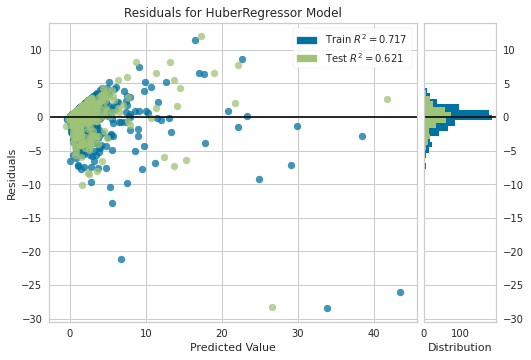

In [ ]:
plot_model(huber)

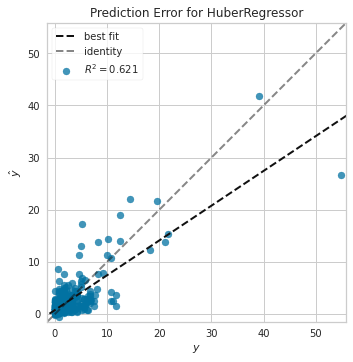

In [ ]:
plot_model(huber, plot = 'error')

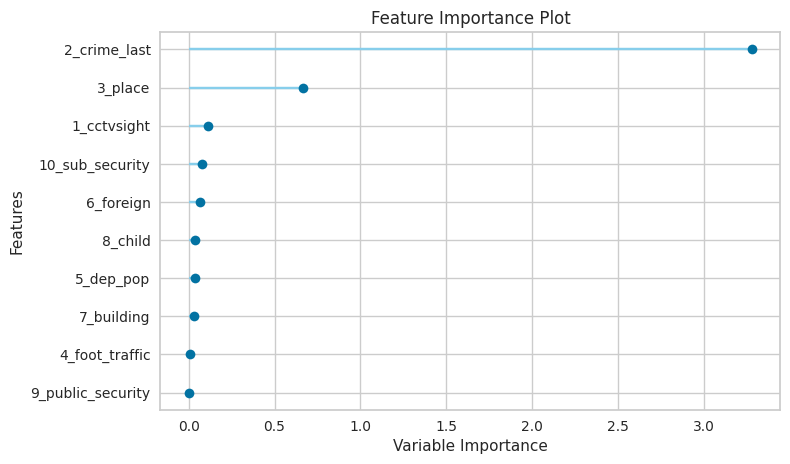

In [ ]:
plot_model(huber, plot='feature')

In [ ]:
huber.coef_

array([-0.03091419,  0.03948959,  3.27944687, -0.1124099 , -0.03713239,
       -0.06794518,  0.01067958,  0.00448581, -0.66570165,  0.07963946])

In [ ]:
fea_imp = pd.DataFrame({'Feature': train.drop(['gid','crime_now'], axis=1).columns, 'Value' : abs(huber.coef_)}).sort_values(by='Value', ascending=False)
fea_imp = fea_imp.reset_index(drop=True)
fea_imp

,Feature,Value
0,2_crime_last,3.279447
1,3_place,0.665702
2,1_cctvsight,0.112410
3,10_sub_security,0.079639
4,6_foreign,0.067945
5,8_child,0.039490
6,5_dep_pop,0.037132
7,7_building,0.030914
8,4_foot_traffic,0.010680
9,9_public_security,0.004486


In [ ]:
fea_imp['percentage'] = fea_imp['Value'] / fea_imp['Value'].sum()

In [ ]:
fea_imp

,Feature,Value,percentage
0,2_crime_last,3.279447,0.757755
1,3_place,0.665702,0.153818
2,1_cctvsight,0.112410,0.025974
3,10_sub_security,0.079639,0.018402
4,6_foreign,0.067945,0.015700
5,8_child,0.039490,0.009125
6,5_dep_pop,0.037132,0.008580
7,7_building,0.030914,0.007143
8,4_foot_traffic,0.010680,0.002468
9,9_public_security,0.004486,0.001037


In [ ]:
fea_imp.to_csv("/opt/app-root/src/complete data/피쳐중요도.csv", index=False)

In [ ]:
predict_model(huber)

In [ ]:
final_model = finalize_model(best)
prediction = predict_model(final_model, data = test)

In [ ]:
prediction

## 가중치 적용 (최종 계산)

In [ ]:
import pandas as pd

count = pd.read_csv('지수_count_sum.csv')

In [ ]:
count

In [ ]:
count = count[['7_building_count', '8_child_count',
       '2_crime_count', '부양인구지수_count', '외국인위험지수_count', '유동인구지수_count',
       '공적감시취약지수_count', '풍속업소지수_count', '감시취약지수_count','대체감시취약지수_count']]

In [ ]:
count.sum()

In [ ]:
sum(count.sum())

689

In [ ]:
list(count.sum()/689)

In [ ]:
hae_value = count.sum()/689
hae_value = pd.DataFrame({'Feature':['7_building_count', '8_child_count',
       '2_crime_last', '5_dep_pop', '6_foreign', '4_foot_traffic',
       '9_public_security', '3_place', '1_cctv','10_sub_security'],
                           'model_value':list(count.sum()/689)})
hae_value

,Feature,model_value
0,7_building_count,0.053701
1,8_child_count,0.121916
2,2_crime_last,0.008708
3,5_dep_pop,0.014514
4,6_foreign,0.121916
5,4_foot_traffic,0.121916
6,9_public_security,0.121916
7,3_place,0.000000
8,1_cctv,0.342525
9,10_sub_security,0.092888


In [ ]:
model_value = pd.DataFrame({'Feature':['2_crime_last','3_place','1_cctv','10_sub_security','6_foreign','8_child','5_dep_pop',\
                                      '7_building','4_foot_traffic','9_public_security'],
                           'model_value':[0.757755,0.153818,0.025974,0.018402,0.0157,0.009125,0.00858,0.007143,0.002468,0.001037]})
model_value

,Feature,model_value
0,2_crime_last,0.757755
1,3_place,0.153818
2,1_cctv,0.025974
3,10_sub_security,0.018402
4,6_foreign,0.015700
5,8_child,0.009125
6,5_dep_pop,0.008580
7,7_building,0.007143
8,4_foot_traffic,0.002468
9,9_public_security,0.001037


In [ ]:
hae_value = hae_value.sort_values(by='Feature')
modelv_value = model_value.sort_values(by='Feature')

In [ ]:
modelv_value['hae_value'] = hae_value['model_value']

In [ ]:
modelv_value['final'] = (modelv_value['model_value']+modelv_value['hae_value'])/2
modelv_value

,Feature,model_value,hae_value,final
3,10_sub_security,0.018402,0.014514,0.016458
2,1_cctv,0.025974,0.008708,0.017341
0,2_crime_last,0.757755,0.053701,0.405728
1,3_place,0.153818,0.121916,0.137867
8,4_foot_traffic,0.002468,0.342525,0.172497
6,5_dep_pop,0.008580,0.121916,0.065248
4,6_foreign,0.015700,0.121916,0.068808
7,7_building,0.007143,0.000000,0.003572
5,8_child,0.009125,0.121916,0.065520
9,9_public_security,0.001037,0.092888,0.046963


In [ ]:
test = pd.read_csv("../모델링/test.csv")
test
test['score'] = test['7_building']*0.003572 + test['감시취약지수']*0.017341 + test['2_crime_2020']*0.405728\
                    +(100-test['풍속업소지수'])*0.137867 + test['유동인구지수']*0.172497 + test['2021_부양인구지수']*0.065248 \
                    +test['2021_외국인위험지수']*0.068808 + test['8_child']*0.065520 + test['공적감시취약지수']*0.046963\
                    +test['대체감시취약지수']*0.016458

test = test.sort_values(by='score', ascending=False)

In [ ]:
test[:50]

/opt/app-root/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


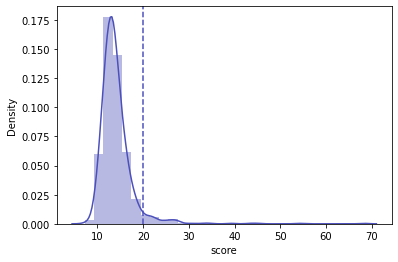

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(test['score'], bins=30, color=mcolors.to_rgba("#4C50BB"))
plt.axvline(20, 0, 1, color=mcolors.to_rgba("#4C50BB"), ls='--')

In [ ]:
test

,gid,7_building,8_child,2_crime_2020,2_crime_2021,감시취약지수,2021_부양인구지수,2021_외국인위험지수,유동인구지수,공적감시취약지수,풍속업소지수,대체감시취약지수,score
323,마라243939,0.000000,95.561588,100.000000,100.000000,43.092866,0.000000,0.355272,71.393389,14.039971,53.333333,73.809524,68.228769
965,마라243938,27.809702,96.784313,62.326870,65.436242,56.031794,100.000000,0.000000,43.429509,24.526024,66.666667,97.619048,54.070305
83,마라258935,0.000000,90.966590,69.529086,52.684564,34.953215,30.769231,1.209910,6.459903,13.057040,64.444444,95.238095,45.063912
234,마라184895,26.482847,95.732968,39.058172,42.617450,78.891237,0.000000,0.136399,20.065207,19.761858,0.000000,100.000000,43.413217
1054,마마119015,0.000000,93.994305,54.847645,79.865772,99.577422,100.000000,0.000000,2.992351,10.021483,100.000000,100.000000,39.295915
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,마라230927,0.000000,92.198527,0.000000,6.040268,50.286749,0.000000,0.311769,0.684761,6.459919,100.000000,90.476190,8.844876
604,마라249969,0.000000,88.695460,0.000000,1.006711,18.543113,0.000000,0.259808,0.938742,15.468925,100.000000,95.238095,8.606585
978,마라179898,25.022813,95.850956,0.000000,1.006711,13.733776,0.000000,0.134234,3.460726,15.157432,100.000000,23.809524,8.317590
649,마라222898,9.924285,46.211171,0.000000,1.342282,89.787705,0.000000,0.303109,0.226426,31.888636,100.000000,92.857143,7.705957


In [ ]:
test[:50].to_csv("final50.csv", index=False)

In [ ]:
import geopandas as gpd

grid = gpd.read_file("5.김해시_격자(100X100).geojson")
grid

/opt/app-root/lib/python3.6/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


,gid,geometry
0,마라231909,"MULTIPOLYGON (((128.85237 35.20590, 128.85239 ..."
1,마라154986,"MULTIPOLYGON (((128.76888 35.27623, 128.76889 ..."
2,마라213944,"MULTIPOLYGON (((128.83312 35.23767, 128.83313 ..."
3,마마105025,"MULTIPOLYGON (((128.71554 35.31194, 128.71555 ..."
4,마라202940,"MULTIPOLYGON (((128.82097 35.23420, 128.82099 ..."
...,...,...
46878,마마175064,"MULTIPOLYGON (((128.79308 35.34630, 128.79310 ..."
46879,마마210038,"MULTIPOLYGON (((128.83121 35.32245, 128.83122 ..."
46880,마라130867,"MULTIPOLYGON (((128.74086 35.16923, 128.74087 ..."
46881,마라166953,"MULTIPOLYGON (((128.78160 35.24635, 128.78162 ..."


In [ ]:
test_w_loca = pd.merge(test, grid)

In [ ]:
test_w_loca['lon' ] = test_w_loca['geometry'].apply(lambda k: k.centroid.x)
test_w_loca['lat' ] = test_w_loca['geometry'].apply(lambda k: k.centroid.y)

In [ ]:
test_w_loca.drop(['geometry'], axis=1, inplace=True)
test_w_loca = test_w_loca[:50]

,gid,7_building,8_child,2_crime_2020,2_crime_2021,감시취약지수,2021_부양인구지수,2021_외국인위험지수,유동인구지수,공적감시취약지수,풍속업소지수,대체감시취약지수,score,lon,lat
0,마라243939,0.000000,95.561588,100.000000,100.000000,43.092866,0.000000,0.355272,71.393389,14.039971,53.333333,73.809524,68.228769,128.866561,35.233244
1,마라243938,27.809702,96.784313,62.326870,65.436242,56.031794,100.000000,0.000000,43.429509,24.526024,66.666667,97.619048,54.070305,128.866545,35.232342
2,마라258935,0.000000,90.966590,69.529086,52.684564,34.953215,30.769231,1.209910,6.459903,13.057040,64.444444,95.238095,45.063912,128.882980,35.229451
3,마라184895,26.482847,95.732968,39.058172,42.617450,78.891237,0.000000,0.136399,20.065207,19.761858,0.000000,100.000000,43.413217,128.801104,35.194293
4,마마119015,0.000000,93.994305,54.847645,79.865772,99.577422,100.000000,0.000000,2.992351,10.021483,100.000000,100.000000,39.295915,128.731355,35.303219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,마라230927,0.000000,92.198527,0.000000,6.040268,50.286749,0.000000,0.311769,0.684761,6.459919,100.000000,90.476190,8.844876,128.852098,35.222587
1184,마라249969,0.000000,88.695460,0.000000,1.006711,18.543113,0.000000,0.259808,0.938742,15.468925,100.000000,95.238095,8.606585,128.873609,35.260213
1185,마라179898,25.022813,95.850956,0.000000,1.006711,13.733776,0.000000,0.134234,3.460726,15.157432,100.000000,23.809524,8.317590,128.795656,35.197057
1186,마라222898,9.924285,46.211171,0.000000,1.342282,89.787705,0.000000,0.303109,0.226426,31.888636,100.000000,92.857143,7.705957,128.842879,35.196542


In [ ]:
test_w_loca.to_csv("final50wloca.csv", index=False)

## 가능한 위치인지 확인

In [ ]:
import geopandas as gpd
import pandas as pd

road = gpd.read_file("도로폭.geojson")
grid = gpd.read_file("5.김해시_격자(100X100).geojson")
candidate = pd.read_csv("final50wloca.csv")

/opt/app-root/lib/python3.6/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [ ]:
road

In [ ]:
candidate = candidate[:50]

In [ ]:
from shapely.geometry import Point

final_loca = []
for i, row in candidate.iterrows():
    flag = 0
    loca = Point(row['lon'],row['lat'])
    for I, Row in road.iterrows():
        r = Row['geometry']
        if r.contains(loca): 
            flag = 1
            break
    print(i)
    if flag == 0:
        final_loca.append(loca)
    else:
        final_loca.append(-1)
            

In [ ]:
final_loca

In [ ]:
river = gpd.read_file("../Data/9.김해시_하천현황.geojson")

In [ ]:
river

In [ ]:
from shapely.geometry import Point

final_loca = []
for i, row in candidate.iterrows():
    flag = 0
    loca = Point(row['lon'],row['lat'])
    for I, Row in river.iterrows():
        r = Row['geometry']
        if r.contains(loca): 
            flag = 1
            break
    print(i)
    if flag == 0:
        final_loca.append(loca)
    else:
        final_loca.append(-1)
            

In [ ]:
candidate['river'] = final_loca

/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
candidate

In [ ]:
building = gpd.read_file("../Data/12.김해시_건물노후도.geojson")

In [ ]:
building

In [ ]:
from shapely.geometry import Point, Polygon
import random
from operator import itemgetter

polys = list(building['geometry'])
point = Point(candidate.loc[candidate['gid']=='마라280954',['lon']].iloc[0],candidate.loc[candidate['gid']=='마라280954',['lat']].iloc[0])
min_distance, min_poly = min(((poly.distance(point), poly) for poly in polys), key=itemgetter(0))

In [ ]:
min_poly.centroid.x

128.9071862984705

In [ ]:
candidate.drop(['river'], axis=1, inplace=True)

/opt/app-root/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
candidate.loc[candidate['gid']=='마라280954',['lon','lat']] = min_poly.centroid.x, min_poly.centroid.y

/opt/app-root/lib/python3.6/site-packages/pandas/core/indexing.py:1758: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [ ]:
candidate.loc[candidate['gid']=='마라280954'] 

,gid,7_building,8_child,2_crime_2020,2_crime_2021,감시취약지수,2021_부양인구지수,2021_외국인위험지수,유동인구지수,공적감시취약지수,풍속업소지수,대체감시취약지수,score,lon,lat
8,마라280954,0.0,95.060473,36.288089,49.66443,99.989939,5.633803,0.75257,12.01278,1.230689,91.111111,100.0,28.106008,128.907186,35.246233


In [ ]:
candidate,to_csv("realrealfinal50.csv", index=False)